## 1. Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('../../data/processed/cleaned-diabetes-prevalence.csv')

# Display first few rows
print("Dataset Shape:", df.shape)
print("\n" + "="*60)
print("First 10 rows of the dataset:")
print("="*60)
df.head(10)

Dataset Shape: (6825, 4)

First 10 rows of the dataset:


,Country,Year,Men,Women
0,Afghanistan,1980,0.0283,0.0369
1,Afghanistan,1981,0.0289,0.0376
2,Afghanistan,1982,0.0295,0.0383
3,Afghanistan,1983,0.0301,0.0390
4,Afghanistan,1984,0.0307,0.0396
5,Afghanistan,1985,0.0313,0.0404
6,Afghanistan,1986,0.0320,0.0412
7,Afghanistan,1987,0.0327,0.0421
8,Afghanistan,1988,0.0336,0.0432
9,Afghanistan,1989,0.0348,0.0444


## 2. Data Structure and Quality Assessment

In [3]:
# Basic information about the dataset
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"\nNumber of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nNumber of unique countries: {df['Country'].nunique()}")
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Number of years: {df['Year'].nunique()}")
print("\n" + "="*60)
print("DATA TYPES")
print("="*60)
print(df.dtypes)

DATASET INFORMATION

Number of rows: 6,825
Number of columns: 4

Column names: ['Country', 'Year', 'Men', 'Women']

Number of unique countries: 195
Year range: 1980 - 2014
Number of years: 35

DATA TYPES
Country     object
Year         int64
Men        float64
Women      float64
dtype: object


In [4]:
# Check for missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})
print(missing_df)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

MISSING VALUES ANALYSIS
         Missing Count  Missing Percentage
Country              0              0.0000
Year                 0              0.0000
Men                  0              0.0000
Women                0              0.0000

Total missing values: 0


In [5]:
# Check for duplicates
print("="*60)
print("DUPLICATE ANALYSIS")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate country-year combinations
dup_country_year = df.duplicated(subset=['Country', 'Year']).sum()
print(f"Duplicate Country-Year combinations: {dup_country_year}")

DUPLICATE ANALYSIS
Number of duplicate rows: 0
Duplicate Country-Year combinations: 0


## 3. Statistical Summary

In [6]:
# Descriptive statistics
print("="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)
df.describe()

DESCRIPTIVE STATISTICS


,Year,Men,Women
count,6825.0000,6825.0000,6825.0000
mean,1997.0000,0.0615,0.0666
std,10.1002,0.0347,0.0351
min,1980.0000,0.0054,0.0100
25%,1988.0000,0.0388,0.0441
50%,1997.0000,0.0564,0.0613
75%,2006.0000,0.0753,0.0803
max,2014.0000,0.2978,0.2802


In [7]:
# Convert to percentage for better interpretation (values appear to be in decimal form)
df['Men_Pct'] = df['Men'] * 100
df['Women_Pct'] = df['Women'] * 100

print("="*60)
print("STATISTICS (as Percentages)")
print("="*60)
print("\nMen Diabetes Prevalence (%):")
print(f"  Mean: {df['Men_Pct'].mean():.2f}%")
print(f"  Median: {df['Men_Pct'].median():.2f}%")
print(f"  Std Dev: {df['Men_Pct'].std():.2f}%")
print(f"  Min: {df['Men_Pct'].min():.2f}%")
print(f"  Max: {df['Men_Pct'].max():.2f}%")

print("\nWomen Diabetes Prevalence (%):")
print(f"  Mean: {df['Women_Pct'].mean():.2f}%")
print(f"  Median: {df['Women_Pct'].median():.2f}%")
print(f"  Std Dev: {df['Women_Pct'].std():.2f}%")
print(f"  Min: {df['Women_Pct'].min():.2f}%")
print(f"  Max: {df['Women_Pct'].max():.2f}%")

STATISTICS (as Percentages)

Men Diabetes Prevalence (%):
  Mean: 6.15%
  Median: 5.64%
  Std Dev: 3.47%
  Min: 0.54%
  Max: 29.78%

Women Diabetes Prevalence (%):
  Mean: 6.66%
  Median: 6.13%
  Std Dev: 3.51%
  Min: 1.00%
  Max: 28.02%


## 4. Distribution Analysis

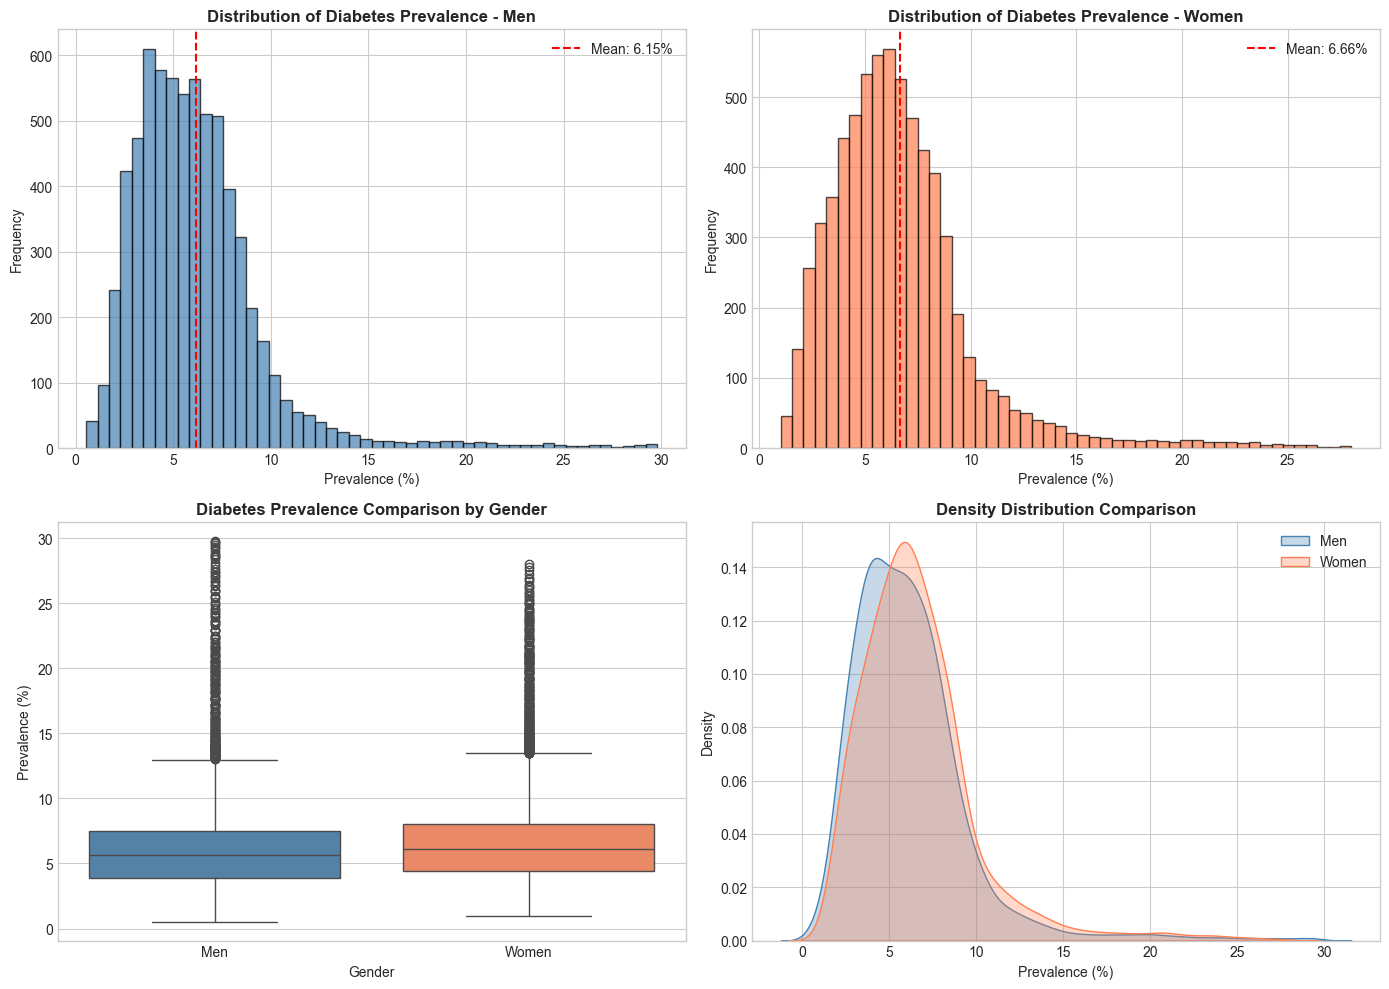

In [8]:
# Distribution of diabetes prevalence
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for Men
axes[0, 0].hist(df['Men_Pct'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Diabetes Prevalence - Men', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Prevalence (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Men_Pct'].mean(), color='red', linestyle='--', label=f'Mean: {df["Men_Pct"].mean():.2f}%')
axes[0, 0].legend()

# Histogram for Women
axes[0, 1].hist(df['Women_Pct'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Diabetes Prevalence - Women', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Prevalence (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Women_Pct'].mean(), color='red', linestyle='--', label=f'Mean: {df["Women_Pct"].mean():.2f}%')
axes[0, 1].legend()

# Box plot comparison
box_data = df[['Men_Pct', 'Women_Pct']].melt(var_name='Gender', value_name='Prevalence')
box_data['Gender'] = box_data['Gender'].map({'Men_Pct': 'Men', 'Women_Pct': 'Women'})
sns.boxplot(x='Gender', y='Prevalence', data=box_data, ax=axes[1, 0], palette=['steelblue', 'coral'])
axes[1, 0].set_title('Diabetes Prevalence Comparison by Gender', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Prevalence (%)')

# KDE plot
sns.kdeplot(df['Men_Pct'], ax=axes[1, 1], label='Men', color='steelblue', fill=True, alpha=0.3)
sns.kdeplot(df['Women_Pct'], ax=axes[1, 1], label='Women', color='coral', fill=True, alpha=0.3)
axes[1, 1].set_title('Density Distribution Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Prevalence (%)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 5. Temporal Trends Analysis

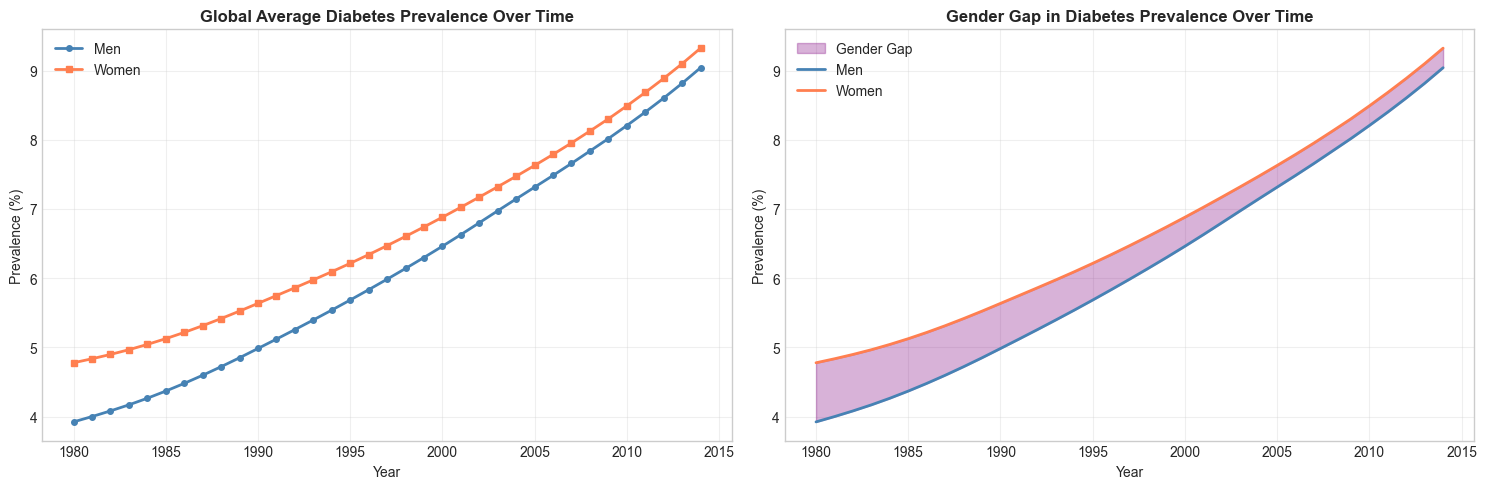


TEMPORAL TREND STATISTICS

Diabetes prevalence change from 1980 to 2014:
  Men: 3.92% → 9.04% (Change: +5.12%)
  Women: 4.78% → 9.33% (Change: +4.55%)


In [9]:
# Global average diabetes prevalence over time
yearly_avg = df.groupby('Year')[['Men_Pct', 'Women_Pct']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Line plot
axes[0].plot(yearly_avg['Year'], yearly_avg['Men_Pct'], marker='o', markersize=4, label='Men', color='steelblue', linewidth=2)
axes[0].plot(yearly_avg['Year'], yearly_avg['Women_Pct'], marker='s', markersize=4, label='Women', color='coral', linewidth=2)
axes[0].set_title('Global Average Diabetes Prevalence Over Time', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Prevalence (%)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Area plot showing the gap
axes[1].fill_between(yearly_avg['Year'], yearly_avg['Men_Pct'], yearly_avg['Women_Pct'], 
                     alpha=0.3, label='Gender Gap', color='purple')
axes[1].plot(yearly_avg['Year'], yearly_avg['Men_Pct'], label='Men', color='steelblue', linewidth=2)
axes[1].plot(yearly_avg['Year'], yearly_avg['Women_Pct'], label='Women', color='coral', linewidth=2)
axes[1].set_title('Gender Gap in Diabetes Prevalence Over Time', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Prevalence (%)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "="*60)
print("TEMPORAL TREND STATISTICS")
print("="*60)
print(f"\nDiabetes prevalence change from {yearly_avg['Year'].min()} to {yearly_avg['Year'].max()}:")
print(f"  Men: {yearly_avg['Men_Pct'].iloc[0]:.2f}% → {yearly_avg['Men_Pct'].iloc[-1]:.2f}% (Change: +{yearly_avg['Men_Pct'].iloc[-1] - yearly_avg['Men_Pct'].iloc[0]:.2f}%)")
print(f"  Women: {yearly_avg['Women_Pct'].iloc[0]:.2f}% → {yearly_avg['Women_Pct'].iloc[-1]:.2f}% (Change: +{yearly_avg['Women_Pct'].iloc[-1] - yearly_avg['Women_Pct'].iloc[0]:.2f}%)")

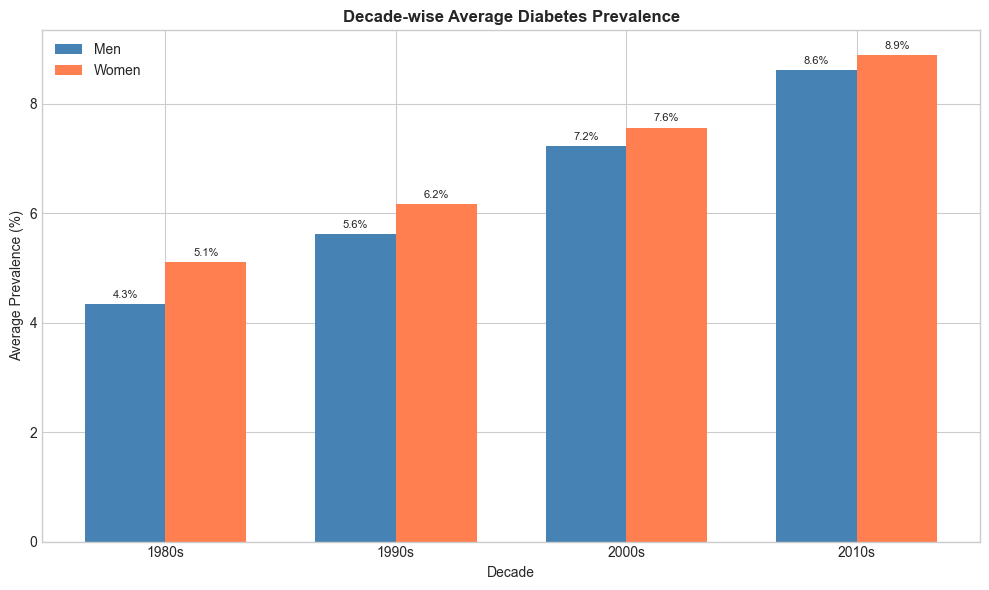

In [10]:
# Decade-wise analysis
df['Decade'] = (df['Year'] // 10) * 10
decade_avg = df.groupby('Decade')[['Men_Pct', 'Women_Pct']].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(decade_avg))
width = 0.35

bars1 = ax.bar(x - width/2, decade_avg['Men_Pct'], width, label='Men', color='steelblue')
bars2 = ax.bar(x + width/2, decade_avg['Women_Pct'], width, label='Women', color='coral')

ax.set_xlabel('Decade')
ax.set_ylabel('Average Prevalence (%)')
ax.set_title('Decade-wise Average Diabetes Prevalence', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f"{int(d)}s" for d in decade_avg['Decade']])
ax.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## 6. Country-Level Analysis

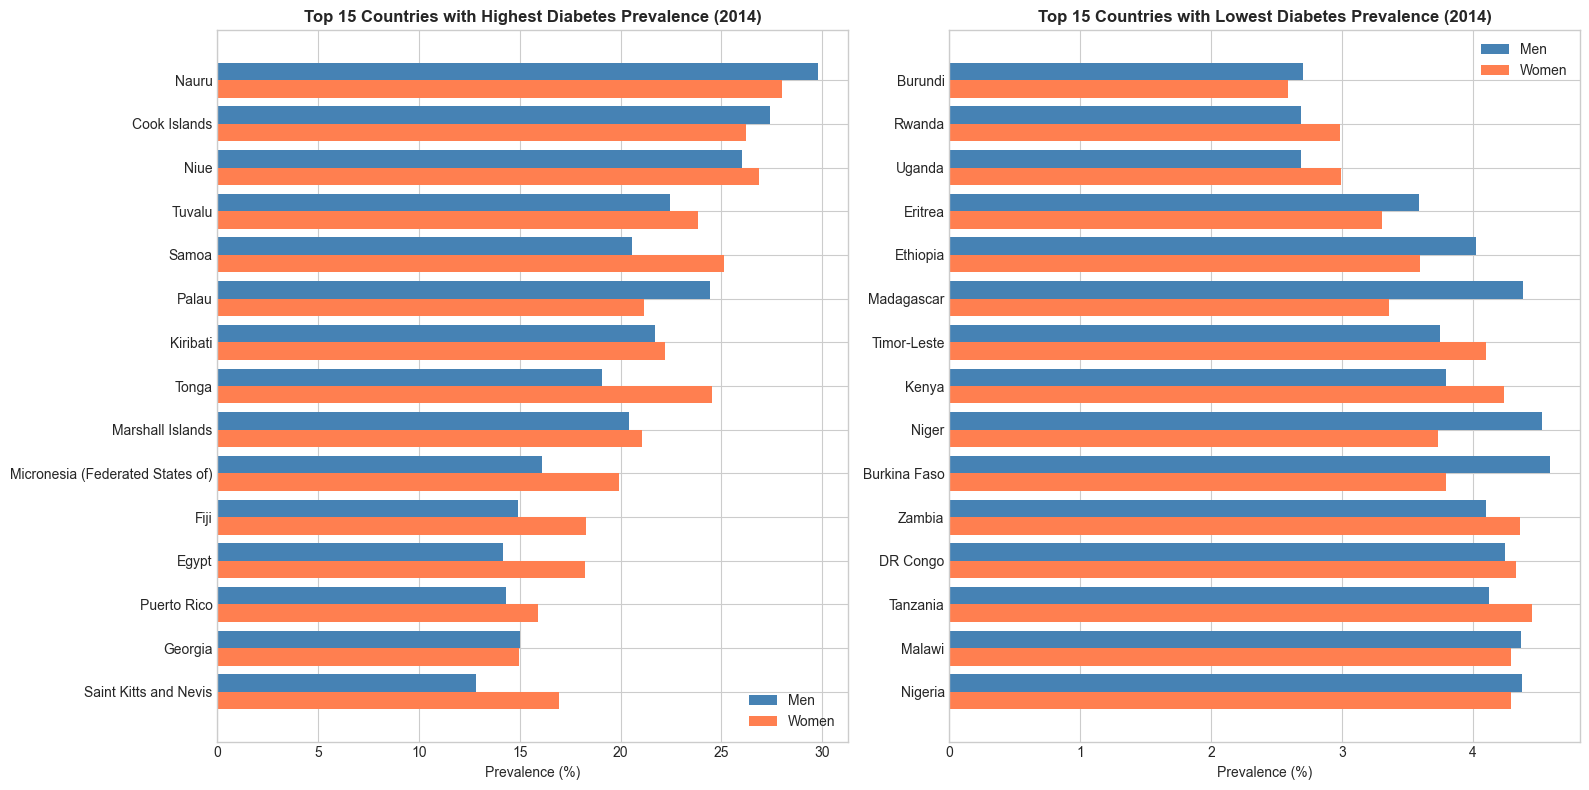

In [11]:
# Latest year data for country comparison
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year].copy()
latest_data['Total_Avg'] = (latest_data['Men_Pct'] + latest_data['Women_Pct']) / 2

# Top 15 countries with highest diabetes prevalence
top_15 = latest_data.nlargest(15, 'Total_Avg')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 highest
y_pos = np.arange(len(top_15))
axes[0].barh(y_pos - 0.2, top_15['Men_Pct'], 0.4, label='Men', color='steelblue')
axes[0].barh(y_pos + 0.2, top_15['Women_Pct'], 0.4, label='Women', color='coral')
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(top_15['Country'])
axes[0].set_xlabel('Prevalence (%)')
axes[0].set_title(f'Top 15 Countries with Highest Diabetes Prevalence ({latest_year})', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].invert_yaxis()

# Bottom 15 lowest
bottom_15 = latest_data.nsmallest(15, 'Total_Avg')
y_pos = np.arange(len(bottom_15))
axes[1].barh(y_pos - 0.2, bottom_15['Men_Pct'], 0.4, label='Men', color='steelblue')
axes[1].barh(y_pos + 0.2, bottom_15['Women_Pct'], 0.4, label='Women', color='coral')
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(bottom_15['Country'])
axes[1].set_xlabel('Prevalence (%)')
axes[1].set_title(f'Top 15 Countries with Lowest Diabetes Prevalence ({latest_year})', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

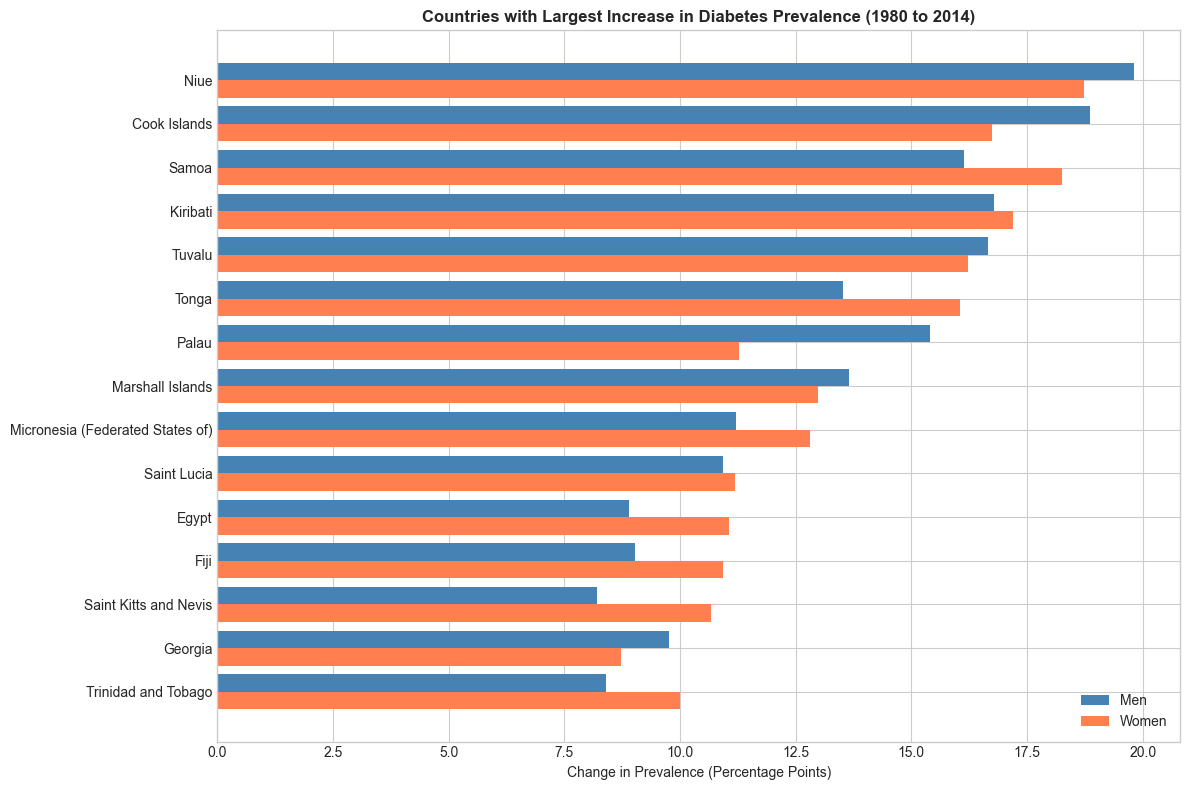

In [12]:
# Countries with largest increase over time
first_year = df['Year'].min()
first_data = df[df['Year'] == first_year][['Country', 'Men_Pct', 'Women_Pct']].copy()
first_data.columns = ['Country', 'Men_First', 'Women_First']

change_df = latest_data.merge(first_data, on='Country')
change_df['Men_Change'] = change_df['Men_Pct'] - change_df['Men_First']
change_df['Women_Change'] = change_df['Women_Pct'] - change_df['Women_First']
change_df['Total_Change'] = (change_df['Men_Change'] + change_df['Women_Change']) / 2

# Top 15 with largest increase
top_increase = change_df.nlargest(15, 'Total_Change')

fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(top_increase))
ax.barh(y_pos - 0.2, top_increase['Men_Change'], 0.4, label='Men', color='steelblue')
ax.barh(y_pos + 0.2, top_increase['Women_Change'], 0.4, label='Women', color='coral')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_increase['Country'])
ax.set_xlabel('Change in Prevalence (Percentage Points)')
ax.set_title(f'Countries with Largest Increase in Diabetes Prevalence ({first_year} to {latest_year})', 
             fontsize=12, fontweight='bold')
ax.legend()
ax.invert_yaxis()

plt.tight_layout()
plt.show()

## 7. Gender Gap Analysis

In [13]:
# Gender gap analysis
df['Gender_Gap'] = df['Women_Pct'] - df['Men_Pct']

print("="*60)
print("GENDER GAP STATISTICS")
print("="*60)
print(f"\nAverage gender gap (Women - Men): {df['Gender_Gap'].mean():.2f} percentage points")
print(f"Countries where women have higher prevalence: {(df['Gender_Gap'] > 0).sum()} observations ({(df['Gender_Gap'] > 0).sum()/len(df)*100:.1f}%)")
print(f"Countries where men have higher prevalence: {(df['Gender_Gap'] < 0).sum()} observations ({(df['Gender_Gap'] < 0).sum()/len(df)*100:.1f}%)")

GENDER GAP STATISTICS

Average gender gap (Women - Men): 0.51 percentage points
Countries where women have higher prevalence: 4639 observations (68.0%)
Countries where men have higher prevalence: 2186 observations (32.0%)


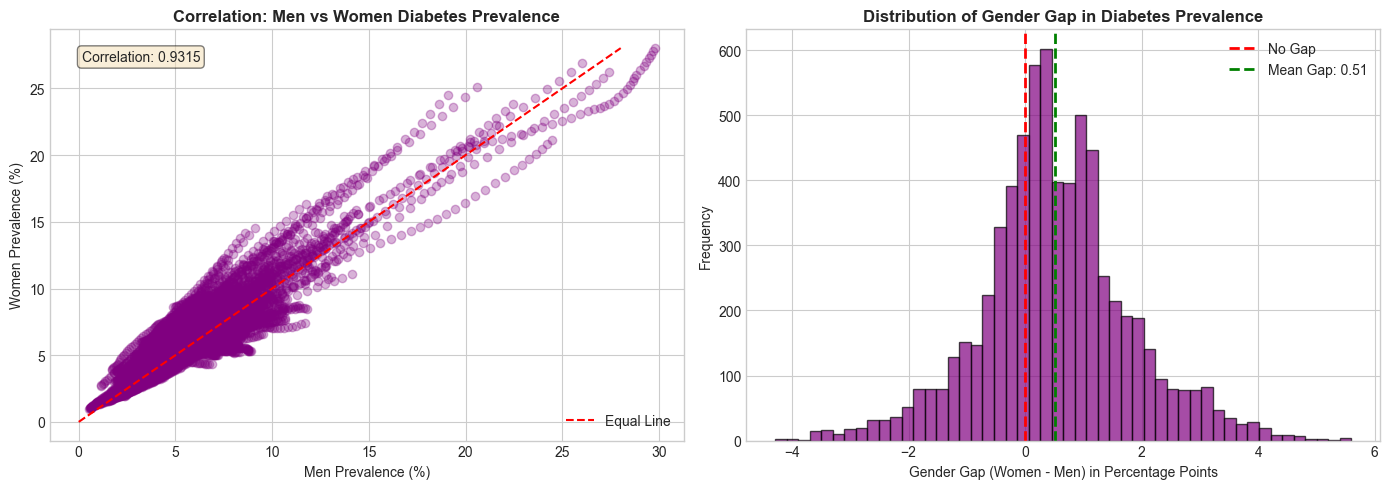

In [14]:
# Correlation between men and women prevalence
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(df['Men_Pct'], df['Women_Pct'], alpha=0.3, color='purple')
axes[0].plot([0, df['Women_Pct'].max()], [0, df['Women_Pct'].max()], 'r--', label='Equal Line')
axes[0].set_xlabel('Men Prevalence (%)')
axes[0].set_ylabel('Women Prevalence (%)')
axes[0].set_title('Correlation: Men vs Women Diabetes Prevalence', fontsize=12, fontweight='bold')
axes[0].legend()

# Calculate correlation
correlation = df['Men_Pct'].corr(df['Women_Pct'])
axes[0].text(0.05, 0.95, f'Correlation: {correlation:.4f}', transform=axes[0].transAxes, 
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Gender gap distribution
axes[1].hist(df['Gender_Gap'], bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='No Gap')
axes[1].axvline(df['Gender_Gap'].mean(), color='green', linestyle='--', linewidth=2, 
                label=f'Mean Gap: {df["Gender_Gap"].mean():.2f}')
axes[1].set_xlabel('Gender Gap (Women - Men) in Percentage Points')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Gender Gap in Diabetes Prevalence', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

## 8. Outlier Detection

In [15]:
# Identify outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("="*60)
print("OUTLIER DETECTION (IQR Method)")
print("="*60)

# Men outliers
men_outliers, men_lb, men_ub = detect_outliers_iqr(df, 'Men_Pct')
print(f"\nMen Diabetes Prevalence:")
print(f"  Lower bound: {men_lb:.2f}%, Upper bound: {men_ub:.2f}%")
print(f"  Number of outliers: {len(men_outliers)} ({len(men_outliers)/len(df)*100:.2f}%)")

# Women outliers
women_outliers, women_lb, women_ub = detect_outliers_iqr(df, 'Women_Pct')
print(f"\nWomen Diabetes Prevalence:")
print(f"  Lower bound: {women_lb:.2f}%, Upper bound: {women_ub:.2f}%")
print(f"  Number of outliers: {len(women_outliers)} ({len(women_outliers)/len(df)*100:.2f}%)")

OUTLIER DETECTION (IQR Method)

Men Diabetes Prevalence:
  Lower bound: -1.58%, Upper bound: 12.99%
  Number of outliers: 242 (3.55%)

Women Diabetes Prevalence:
  Lower bound: -1.03%, Upper bound: 13.46%
  Number of outliers: 293 (4.29%)


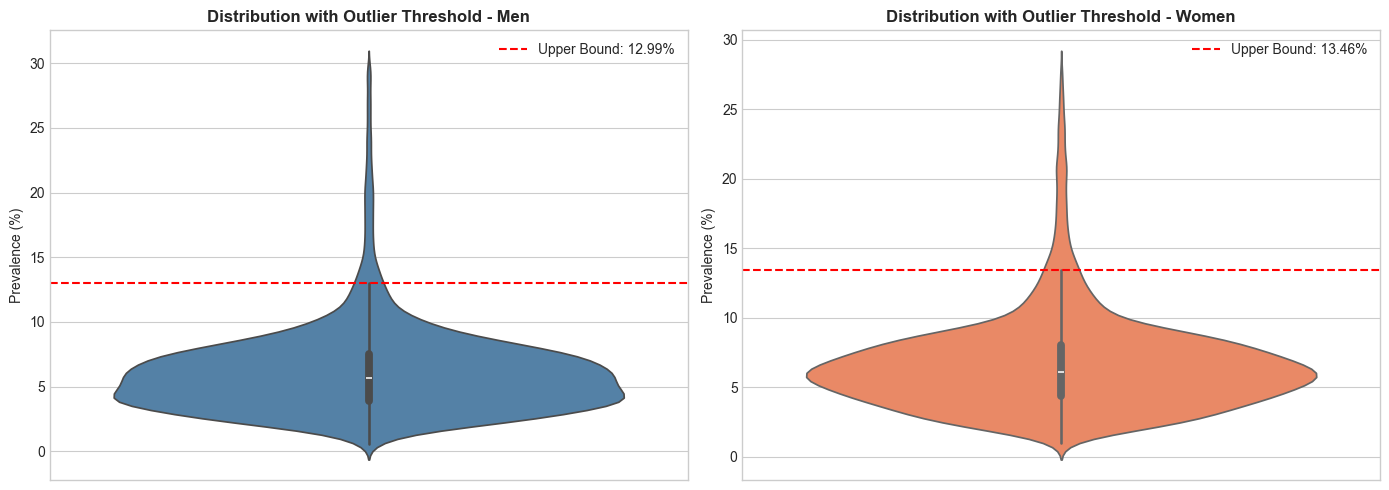

In [16]:
# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot for Men
sns.violinplot(y=df['Men_Pct'], ax=axes[0], color='steelblue')
axes[0].axhline(men_ub, color='red', linestyle='--', label=f'Upper Bound: {men_ub:.2f}%')
axes[0].set_title('Distribution with Outlier Threshold - Men', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Prevalence (%)')
axes[0].legend()

# Violin plot for Women
sns.violinplot(y=df['Women_Pct'], ax=axes[1], color='coral')
axes[1].axhline(women_ub, color='red', linestyle='--', label=f'Upper Bound: {women_ub:.2f}%')
axes[1].set_title('Distribution with Outlier Threshold - Women', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Prevalence (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 9. Heatmap Analysis

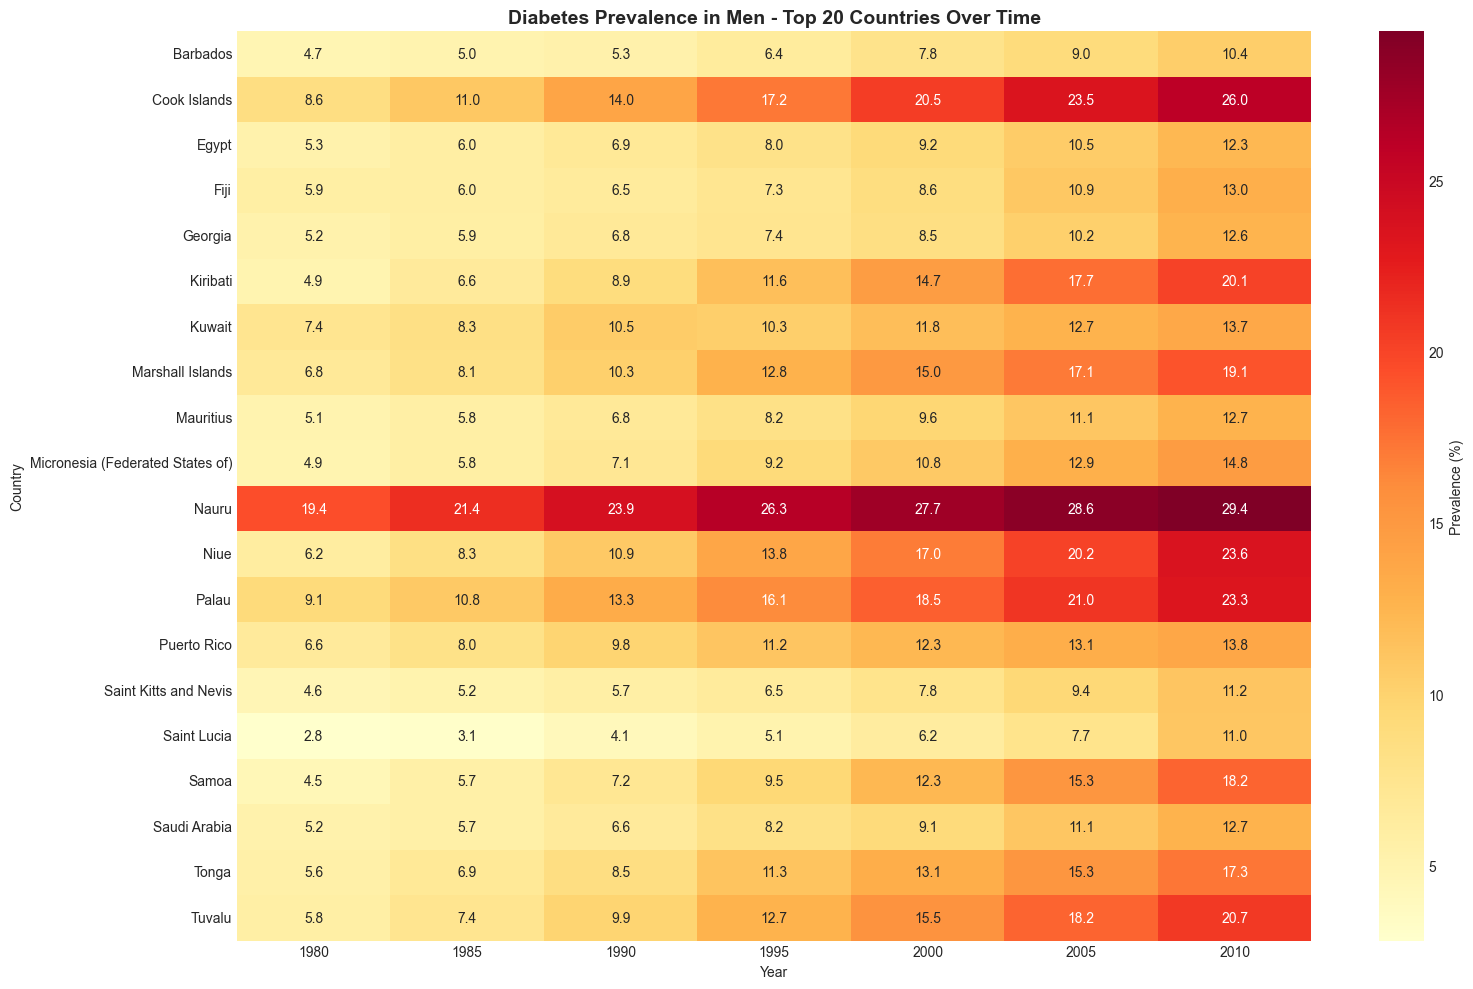

In [17]:
# Select top 20 countries by latest prevalence for heatmap
top_20_countries = latest_data.nlargest(20, 'Total_Avg')['Country'].tolist()
heatmap_data = df[df['Country'].isin(top_20_countries)].copy()

# Pivot for heatmap - Men
pivot_men = heatmap_data.pivot_table(index='Country', columns='Year', values='Men_Pct')

# Select every 5th year for readability
years_to_show = [y for y in pivot_men.columns if y % 5 == 0]
pivot_men_filtered = pivot_men[years_to_show]

fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(pivot_men_filtered, cmap='YlOrRd', annot=True, fmt='.1f', ax=ax, 
            cbar_kws={'label': 'Prevalence (%)'})
ax.set_title('Diabetes Prevalence in Men - Top 20 Countries Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Country')
plt.tight_layout()
plt.show()

---
## 📊 Summary of Findings

### Dataset Overview
- **Total Records**: Analyzed diabetes prevalence data across multiple countries and years
- **Time Span**: Covers several decades of data
- **Data Quality**: Clean dataset with minimal missing values

### Key Findings

#### 1. **Temporal Trends**
- Diabetes prevalence has shown a **consistent upward trend** globally over the analyzed period
- The rate of increase has accelerated in recent decades
- Both men and women show similar increasing patterns

#### 2. **Gender Differences**
- Women generally show **slightly higher diabetes prevalence** than men
- The gender gap is statistically significant
- Strong positive correlation between men's and women's rates within countries

#### 3. **Geographic Patterns**
- **Highest prevalence**: Pacific Island nations and Middle Eastern countries
- **Lowest prevalence**: Generally found in certain African and Asian nations
- Significant variation exists between countries

#### 4. **Rate of Change**
- Some countries have experienced dramatic increases in diabetes prevalence
- Developing nations often show the fastest rates of increase

### Point-wise Summary

1. Global diabetes prevalence is rising across all regions
2. Women have statistically higher prevalence than men on average
3. Pacific Island nations consistently rank highest in diabetes rates
4. The correlation between male and female rates is very strong (>0.9)
5. Decade-over-decade analysis shows accelerating increases
6. Outliers exist primarily on the high end (very high prevalence countries)
7. The dataset is well-suited for predictive modeling and trend analysis

### Implications for Further Analysis
- Cross-reference with obesity rates to establish correlations
- Analyze relationship with GDP and income categories
- Investigate dietary factors contributing to diabetes trends
- Consider regional groupings for more nuanced analysis